Import Libraries

In [1]:
import pandas as pd

iMPORT DATASET 


In [4]:
data = pd.read_csv("Position_Salaries.csv")
print(data)

X = data.iloc[: , 1:-1].values
y = data.iloc[: , -1].values

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Feature Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

print(X[:3,:])
print(y[:3,:])

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]]


Fit the Model

In [29]:
from sklearn.svm import SVR

svr=SVR(kernel="rbf")
svr.fit(X , y)

C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predict for 6.5 level

In [30]:
value = 6.5
scaled_value = sc_x.transform([[6.5]])
print("scaled value=",scaled_value)


scaled_prediction = svr.predict(scaled_value)
print("Scaled Prediction =" , scaled_prediction)

print("Final prediction =",sc_y.inverse_transform(scaled_prediction.reshape(-1 , 1)))

scaled value= [[0.34815531]]
Scaled Prediction = [-0.27861589]
Final prediction = [[170370.0204065]]


Performance

In [31]:
y_pred = svr.predict(X)

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE=",mean_squared_error(y_true = y ,y_pred= y_pred))
print("MAE=",mean_squared_error(y_true = y ,y_pred= y_pred))
print("R2 Score=",r2_score(y_true = y ,y_pred= y_pred))

MSE= 0.24839989293792014
MAE= 0.24839989293792014
R2 Score= 0.7516001070620798


Visualization

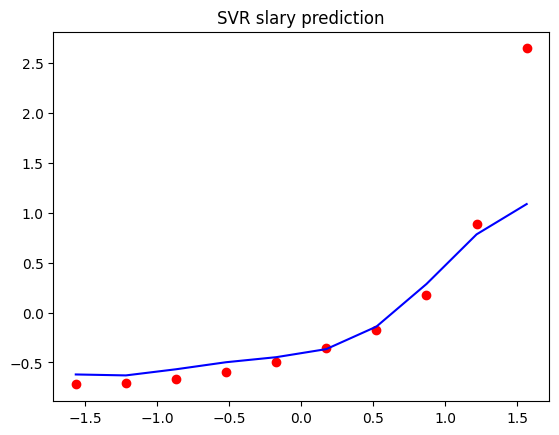

In [32]:
import matplotlib.pyplot as plt

plt.plot(X, y_pred , color = "blue")
plt.scatter(X, y, color="red")
plt.title("SVR slary prediction")
plt.show()